# Desafío Maximzación de las Esperanzas

## 1. Preparación del ambiente de trabajo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import os
import glob

plt.style.use('seaborn')                
plt.rcParams['figure.figsize'] = (8,6)  

In [2]:
dire = os.getcwd()+'\dump'

In [3]:
df = pd.concat(map(pd.read_csv, glob.glob(dire+'/*.csv')))

In [4]:
df.drop(labels='Unnamed: 0',axis=1, inplace=True)

In [5]:
df.sample(10)

,0,1,2,3
49,Nickelback,rock,Yanking Out My...,Feelin' fine \n Let's rip out yours instead of...
245,The Smashing Pumpkins,rock,Nothing And Everything,Hiding behind my hair today \n My eyes dance w...
3,Faith No More,rock,Why Do You Bother?,Why hold on? \n Your hands are getting sore \n...
374,Eminem,hiphop,Microphone Fiend,Once again it's the sinister cynical minister ...
54,Dr. Dre,hiphop,Deep Water,Kendrick Lamar \n (Where you from man?) \n Q: ...
332,Bob Dylan,rock,High Water,High water risin' \n Risin' night and day \n A...
70,Anthrax,metal,Random Acts Of Senseless Violence,"Shut up, don't pass the blame \n The same god-..."
82,Spice Girls,pop,This Is How We Party,"This is how we party, fooling with your body, ..."
64,De La Soul,hiphop,Dave Has A Problem...Seriously,Dave has a problem... seriously \n DOVE: \n Yo...
70,De La Soul,hiphop,Stix & Stonz,"Chorus: All \n If you can dig it, deal with it..."


In [6]:
columns_name={'0': 'artist',
       '1': 'genre',
       '2':'song',
       '3':'lyrics'}

In [7]:
df.rename(columns = columns_name, inplace=True)

In [8]:
df.sample(10)

,artist,genre,song,lyrics
123,Mobb Deep,hiphop,Real Niggaz,(Intro Havoc) \n Yeah y'all know what it is \n...
180,The Smashing Pumpkins,rock,Tarantula,I don't want to fight every single night \n Ev...
54,Nickelback,rock,Animals,"I, I'm driving black on black \n Just got my l..."
34,Killer Mike,hiphop,Willie Burke Sherwood,"No matter how good a woman is, she still can't..."
52,Metallica,metal,Until It Sleeps,Where do I take this pain of mine? \n I run bu...
216,Red Hot Chili Peppers,rock,The Hunter,Woke up this morning like I always do \n I sti...
17,Weezer,rock,Pink Triangle,"Unfortunately, we are not licensed to display ..."
123,Michael Jackson,pop,You Are Not Alone (Classic Club Mix),Another day has gone \n I'm still all alone \n...
1,Bruce Springsteen,rock,Growin' Up,Well I stood stone-like at midnight \n Suspend...
265,Bob Dylan,rock,Death Is Not The End,When you're sad and when you're lonely and you...


## 2. Matriz de ocurrencias

In [9]:
vectorizer=CountVectorizer(stop_words='english', max_features=5000)
count_vectorizer_fit = vectorizer.fit_transform(df['lyrics'])

## 3. Entrenamiento del Modelo

In [10]:
search_params = {'n_components': [5, 10, 15], 'learning_decay': [0.7, 0.5]}

In [11]:
model_LDA = GridSearchCV(LatentDirichletAllocation(learning_method='online'),param_grid=search_params,cv = 5, n_jobs=-1).fit(count_vectorizer_fit)

In [13]:
model_LDA.best_params_

{'learning_decay': 0.5, 'n_components': 5}

In [14]:
model_LDA.best_score_

-1853765.115269902

Los mejores parametro son: component 5 y learning decay de 0.5. 

## 4. Inferencia e Identificación de Tópicos

In [15]:
model_LDA_best = model_LDA.best_estimator_

In [16]:
model_LDA_best.components_

array([[ 0.20336975, 87.04038614,  0.25175309, ..., 24.04907678,
        28.0921337 , 19.52745432],
       [ 0.20460789,  0.20239855,  0.20332537, ...,  0.2039902 ,
         0.20521264,  0.20254172],
       [27.09825618, 20.96952698, 65.3585355 , ..., 19.75285813,
         0.20215944,  0.20303721],
       [ 0.20268107,  0.2031017 ,  0.20335051, ...,  0.2040113 ,
         0.20090442,  0.20156469],
       [ 0.20189497,  0.20118113,  0.20181983, ...,  0.20465838,
         0.20052793,  0.20268737]])

In [20]:
for topic_id, topic_name in enumerate(model_LDA_best.components_):
    print("tópico: {}".format(topic_id + 1))
    print(" ".join([vectorizer.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]]))

tópico: 1
like shit yo nigga fuck got yeah ya know niggas cause don la bitch ain
tópico: 2
ll like ve away day night light sun come just heart way home long eyes
tópico: 3
got don just ain man like know say cause good said everybody money em better
tópico: 4
life god die death world dead blood soul time pain war live hell kill mind
tópico: 5
love oh don know yeah want baby let just ll ve come way say time


## 5. Identificación de probabilidades

In [70]:
model_LDA_best = model_LDA_best.transform(count_vectorizer_fit)

In [139]:
topics_for_each_doc = pd.DataFrame(np.round(model_LDA_best, 3),index=df.index)

In [140]:
topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x), range(1, model_LDA.best_estimator_.n_components + 1)))

In [141]:
concatenated_df = pd.concat([df, topics_for_each_doc], axis=1)

In [142]:
concatenated_df['highest_topic'] = np.argmax(topics_for_each_doc.values, axis=1) + 1

In [143]:
concatenated_df.head()

,artist,genre,song,lyrics,T: 1,T: 2,T: 3,T: 4,T: 5,highest_topic
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee...",0.006,0.734,0.075,0.180,0.006,2
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...,0.005,0.319,0.268,0.403,0.005,4
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...,0.002,0.312,0.002,0.683,0.002,4
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...,0.100,0.407,0.117,0.373,0.003,2
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...,0.082,0.510,0.403,0.003,0.003,2


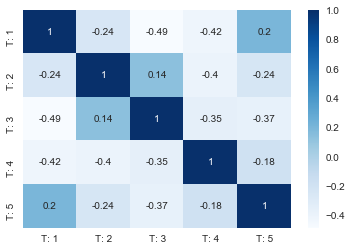

In [144]:
sns.heatmap(concatenated_df.loc[:, 'T: 1':'T: 5'].corr(), annot=True, cmap="Blues");

Lo más relevante es la existe una correlación inversa entre los toícos 1 y 3, pero aún así no es tan fuerte, ya que no supero un umbral de -0.5.

In [154]:
def p_genre(df, artist):
    return df[df['artist'] == artist].loc[:, 'T: 1':'T: 5']

In [155]:
pr_gen = p_genre(concatenated_df, 'Anthrax')
pr_gen.columns = ['hardcore-rap', 'rock', 'pop', 'metal', 'bling-era']
pr_gen.apply(np.mean, axis=0).sort_values()

bling-era       0.053376
hardcore-rap    0.080988
rock            0.265018
metal           0.299559
pop             0.301076
dtype: float64

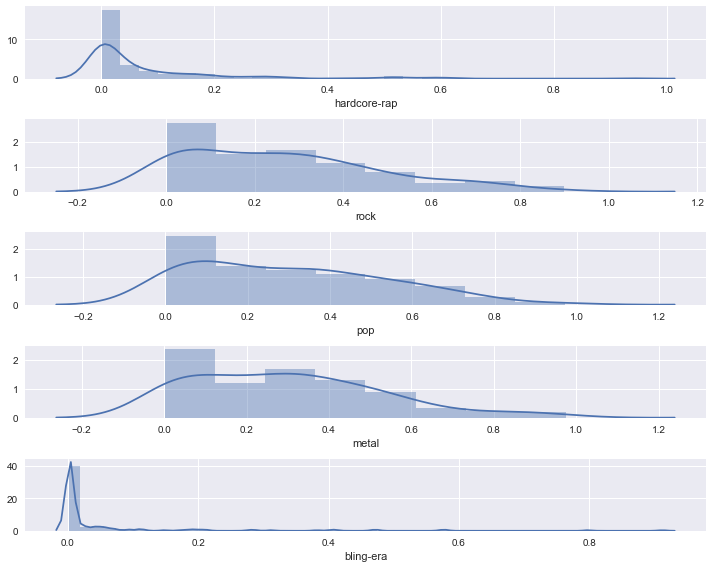

In [157]:
plt.figure(figsize=(10, 8))
for index, (colname, serie) in enumerate(pr_gen.iteritems()):
    plt.subplot(5, 1, index + 1)
    sns.distplot(serie)
    plt.tight_layout()

Existe una mayor probabilidad de que Anthrax, pertenezca a al género pop o metal.